# <div align="center"> Projek Uas Data Modelling </div>
## <div align="center"> [House Rent Prediction]</div>
#### <div align="center"> Kelompok 8 </div>

### Febianus Felix W   00000072737
### Ferdyan Hidayat    00000072575
### Josua Rivo Muin    00000072776
### Rivaldo Yosia H    00000071997
### Adelio Nohan A     00000073372

# Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv("House_Rent_Dataset.csv")
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3]:
data.shape

(4746, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
data['Posted On'] = pd.to_datetime(data['Posted On'])

In [6]:
data.describe()

,Posted On,BHK,Rent,Size,Bathroom
count,4746,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2022-06-07 18:01:40.126422272,2.083860,3.499345e+04,967.490729,1.965866
min,2022-04-13 00:00:00,1.000000,1.200000e+03,10.000000,1.000000
25%,2022-05-20 00:00:00,2.000000,1.000000e+04,550.000000,1.000000
50%,2022-06-10 00:00:00,2.000000,1.600000e+04,850.000000,2.000000
75%,2022-06-28 00:00:00,3.000000,3.300000e+04,1200.000000,2.000000
max,2022-07-11 00:00:00,6.000000,3.500000e+06,8000.000000,10.000000
std,NaN,0.832256,7.810641e+04,634.202328,0.884532


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


# VISUALISASI DATA


In [8]:
#Creatiing numeric dataframe
num_var = data[['BHK', 'Rent', 'Size']]

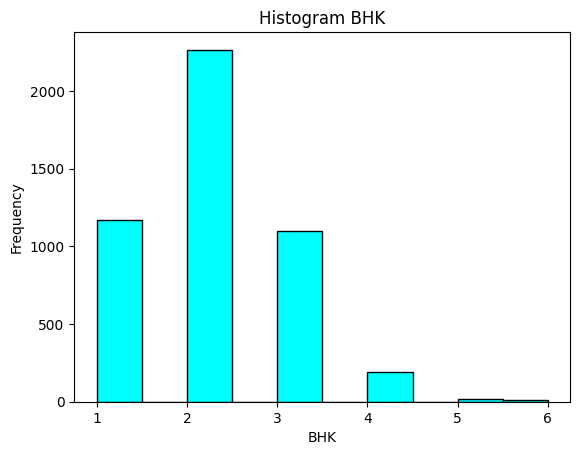

In [9]:
# Histogram of Variable BHK

# Creating a histogram of the 'BHK' column
plt.hist(num_var['BHK'], bins=10, color='cyan', edgecolor='black')

# Adding labels to the x and y axes
plt.xlabel('BHK')
plt.ylabel('Frequency')

# Adding a title to the plot
plt.title('Histogram BHK')

# Displaying the plot
plt.show()


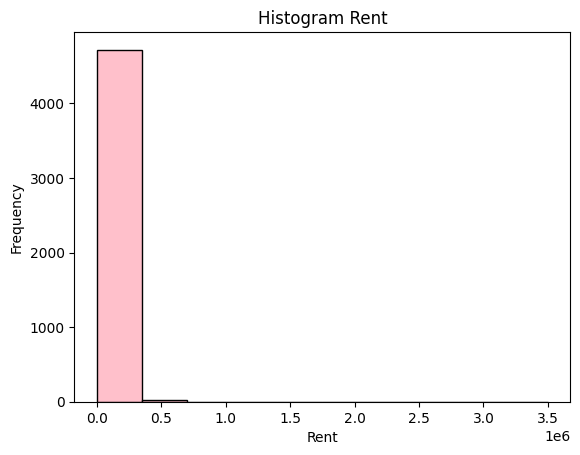

In [10]:
# Histogram of Variable Rent

# Creating a histogram of the 'Rent' column
plt.hist(num_var['Rent'], bins=10, color='pink', edgecolor='black')

# Adding labels to the x and y axes
plt.xlabel('Rent')
plt.ylabel('Frequency')

# Adding a title to the plot
plt.title('Histogram Rent')

# Displaying the plot
plt.show()


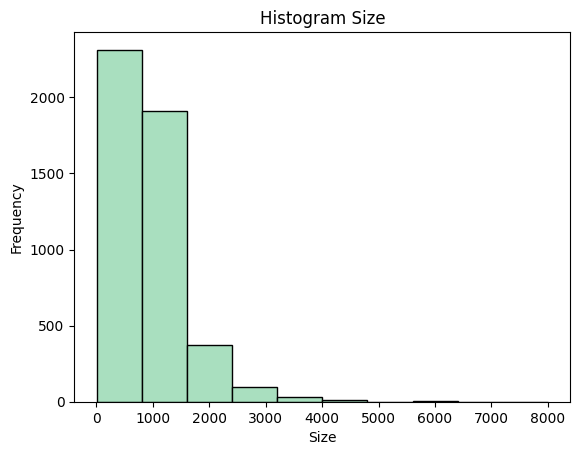

In [11]:
# Histogram of Variable Size

# Creating a histogram of the 'Size' column
plt.hist(num_var['Size'], bins=10, color='#A9DFBF', edgecolor='black')

# Adding labels to the x and y axes
plt.xlabel('Size')
plt.ylabel('Frequency')

# Adding a title to the plot
plt.title('Histogram Size')

# Displaying the plot
plt.show()


# Memeriksa nilai yang hilang

In [12]:
data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

# Outliers Cek

Mean BHK: 2.0838600927096502
Median: 2.0


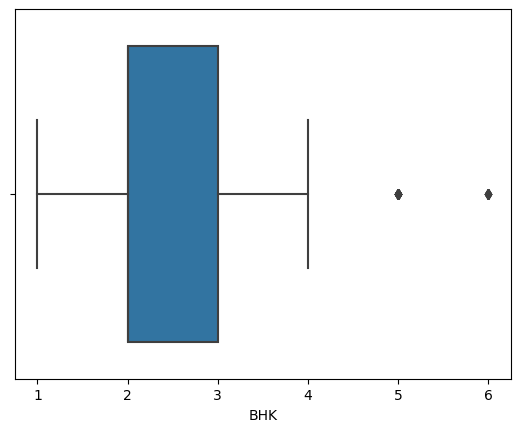

In [13]:
sns.boxplot(x="BHK",data=data)

mean_bhk = data['BHK'].mean()

print(f'Mean BHK: {mean_bhk}')

median_bhk = np.median(data['BHK'])

# Menampilkan hasil
print(f'Median: {median_bhk}')

Mean Rent: 34993.45132743363
Median: 16000.0


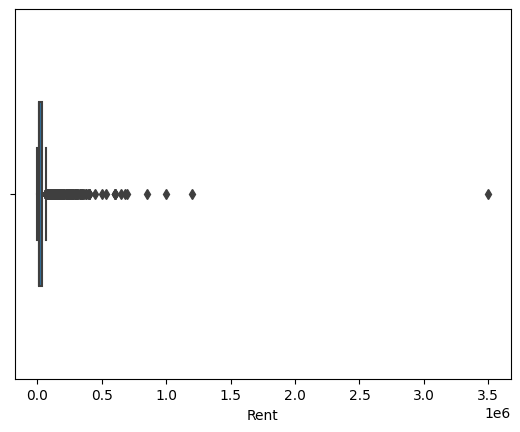

In [14]:
sns.boxplot(x="Rent",data=data,  width=0.5, whis=1.5)

mean_rent = data['Rent'].mean()
print(f'Mean Rent: {mean_rent}')

median_rent = np.median(data['Rent'])

# Menampilkan hasil
print(f'Median: {median_rent}')

Mean Size: 967.4907290349768
Median: 850.0


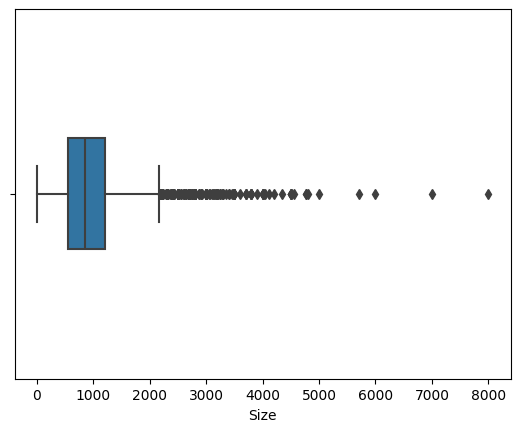

In [15]:
sns.boxplot(x="Size",data=data, width=0.3)

mean_size = data['Size'].mean()
print(f'Mean Size: {mean_size}')

median_size = np.median(data['Size'])

# Menampilkan hasil
print(f'Median: {median_size}')

Mean Bathroom: 1.965865992414665
Median: 2.0


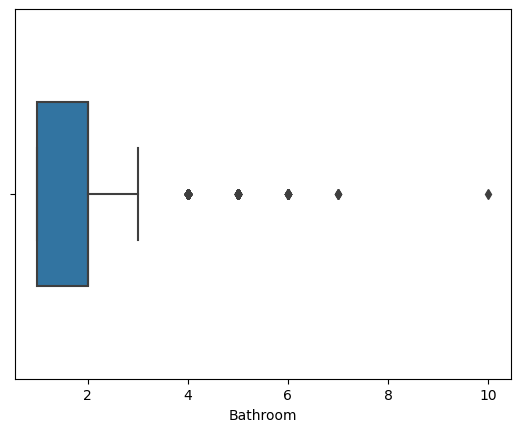

In [16]:
sns.boxplot(x="Bathroom", data=data, width=0.5)


mean_bathroom = data['Bathroom'].mean()
print(f'Mean Bathroom: {mean_bathroom}')

median_bathroom = np.median(data['Bathroom'])

# Menampilkan hasil
print(f'Median: {median_bathroom}')

In [17]:
Q1=data['BHK'].quantile(0.25)
Q3=data['BHK'].quantile(0.75)
IQR=Q3-Q1
Lower_Bound = Q1 - (1.5 * IQR)
Upper_Bound = Q3 + (1.5 * IQR)

data.loc[(data['BHK']>Upper_Bound)] = data['BHK'].median()

C:\Users\Felix\AppData\Local\Temp\ipykernel_8996\1379401493.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data.loc[(data['BHK']>Upper_Bound)] = data['BHK'].median()


# Outlier Removal and Manipulation

<Axes: xlabel='BHK'>

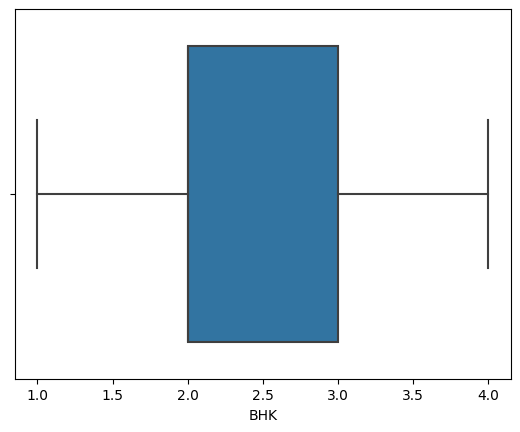

In [18]:
sns.boxplot(x="BHK",data=data)

In [19]:
Q1_Rent=data['Rent'].quantile(0.25)
Q3_Rent=data['Rent'].quantile(0.75)
IQR_Rent=Q3_Rent-Q1_Rent
LowerBoundRent = Q1_Rent - 1.5 * IQR_Rent
UpperBoundRent = Q3_Rent + 1.5 * IQR_Rent

data.loc[(data['Rent']>UpperBoundRent)] = UpperBoundRent

<Axes: xlabel='Rent'>

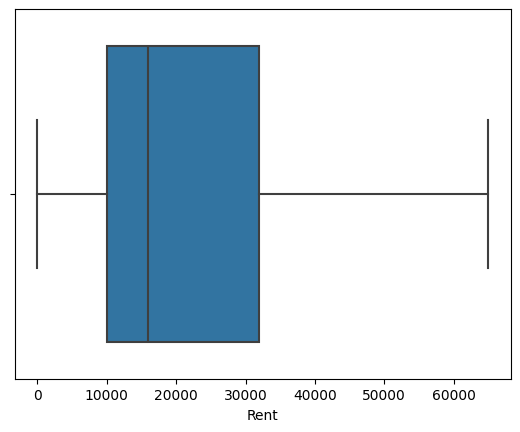

In [20]:
sns.boxplot(x="Rent",data=data)

In [21]:
Q1_Size=data['Size'].quantile(0.25)
Q3_Size=data['Size'].quantile(0.75)
IQR_Size=Q3_Size-Q1_Size
LowerBoundSize = Q1_Size - 1.5 * IQR_Size
UpperBoundSize = Q3_Size + 1.5 * IQR_Size

data.loc[(data['Size']>UpperBoundSize)] = UpperBoundSize

C:\Users\Felix\AppData\Local\Temp\ipykernel_8996\1080578898.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2377.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data['Size']>UpperBoundSize)] = UpperBoundSize
C:\Users\Felix\AppData\Local\Temp\ipykernel_8996\1080578898.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2377.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data['Size']>UpperBoundSize)] = UpperBoundSize
C:\Users\Felix\AppData\Local\Temp\ipykernel_8996\1080578898.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2377.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(

<Axes: xlabel='Size'>

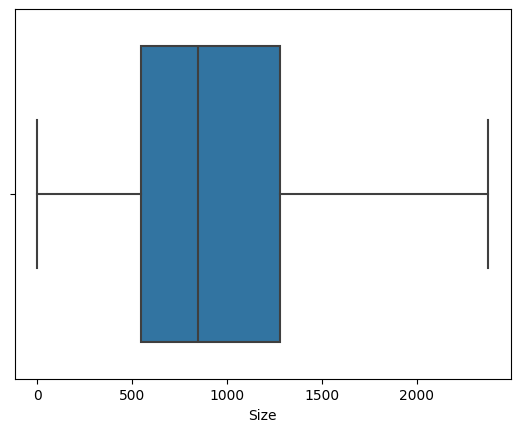

In [22]:
sns.boxplot(x="Size",data=data)

In [23]:
Q1_Bathroom=data['Bathroom'].quantile(0.25)
Q3_Bathroom=data['Bathroom'].quantile(0.75)
IQR_Bathroom=Q3_Bathroom-Q1_Bathroom
LowerBoundBathroom = Q1_Bathroom - 1.5 * IQR_Bathroom
UpperBoundBathroom = Q3_Bathroom + 1.5 * IQR_Bathroom

data.loc[(data['Bathroom']>UpperBoundBathroom)] = data['Bathroom'].median()

<Axes: xlabel='Bathroom'>

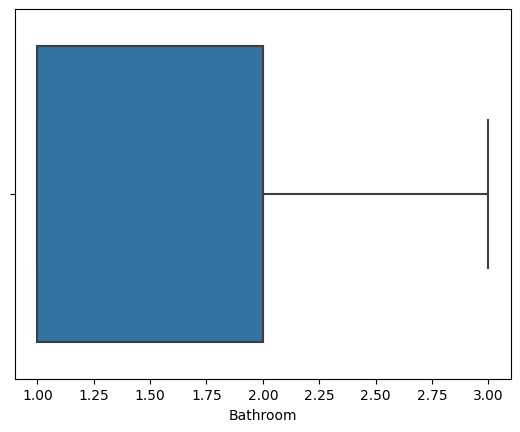

In [24]:
sns.boxplot(x="Bathroom",data=data)

## Histplot

C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BHK', ylabel='Count'>

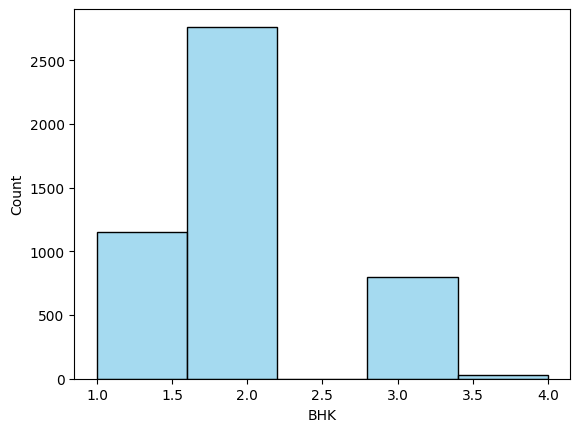

In [25]:
sns.histplot(data['BHK'], bins=5, kde=False, color='skyblue')

C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rent', ylabel='Count'>

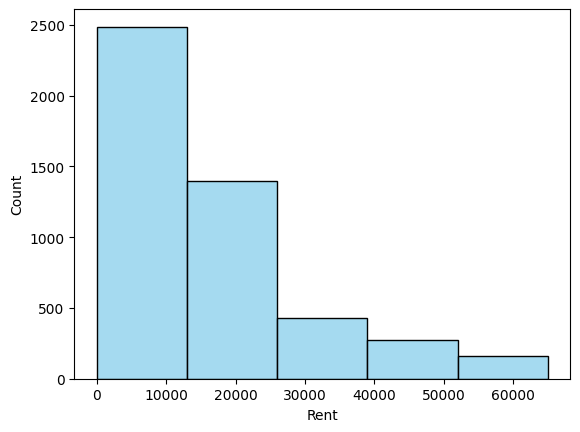

In [26]:
sns.histplot(data['Rent'], bins=5, kde=False, color='skyblue')

C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Size', ylabel='Count'>

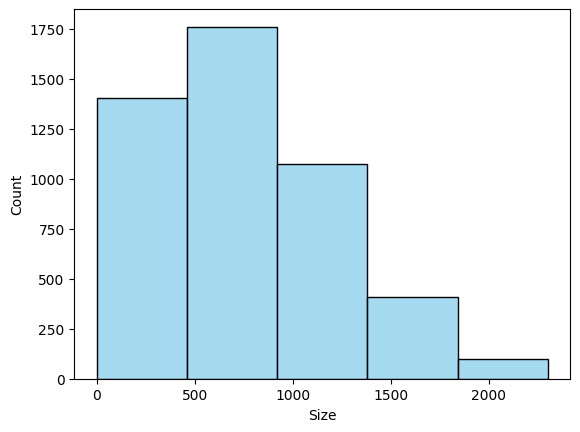

In [27]:
sns.histplot(data['Size'], bins=5, kde=False, color='skyblue')

C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bathroom', ylabel='Count'>

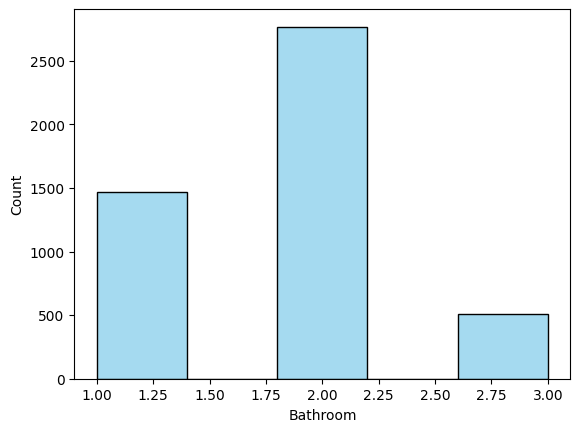

In [28]:
sns.histplot(data['Bathroom'], bins=5, kde=False, color='skyblue')

# Pre Requisite (Before Linear Regression Cek) 

In [29]:
data.dtypes

Posted On             object
BHK                  float64
Rent                 float64
Size                 float64
Floor                 object
Area Type             object
Area Locality         object
City                  object
Furnishing Status     object
Tenant Preferred      object
Bathroom             float64
Point of Contact      object
dtype: object

In [30]:
data.drop(['Posted On', 'Floor','Area Locality'],axis=1,inplace=True)

In [31]:
data[['BHK','Rent','Size','Bathroom']] = data[['BHK','Rent','Size','Bathroom']].astype(int)

In [32]:
data.dtypes

BHK                   int32
Rent                  int32
Size                  int32
Area Type            object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int32
Point of Contact     object
dtype: object

C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felix\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

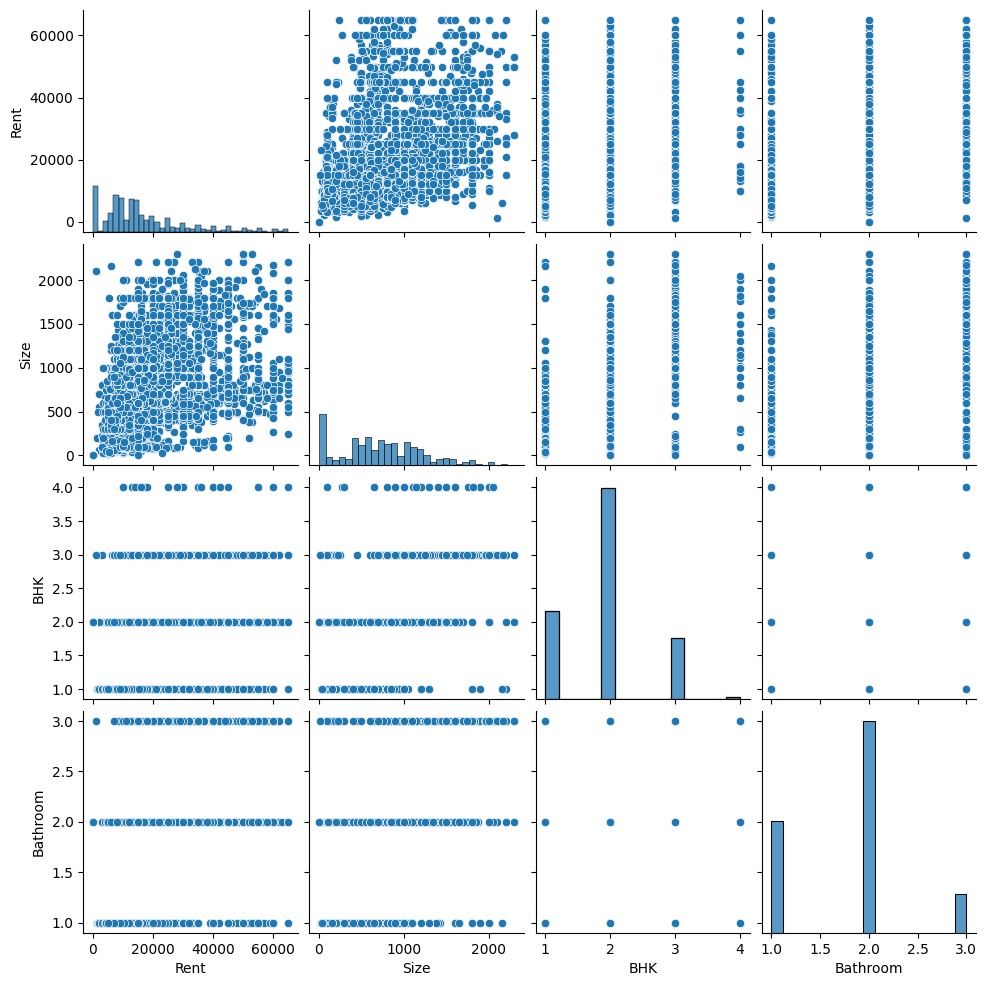

              Size       BHK  Bathroom      Rent
Size      1.000000  0.540249  0.468801  0.510599
BHK       0.540249  1.000000  0.729119  0.315875
Bathroom  0.468801  0.729119  1.000000  0.375538
Rent      0.510599  0.315875  0.375538  1.000000
                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     642.2
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        22:48:03   Log-Likelihood:                -51242.
No. Observations:                4746   AIC:                         1.025e+05
Df Residuals:                    4742   BIC:                         1.025e+05
Df Model:                           3                                         
Covariance Type:            nonrobust       

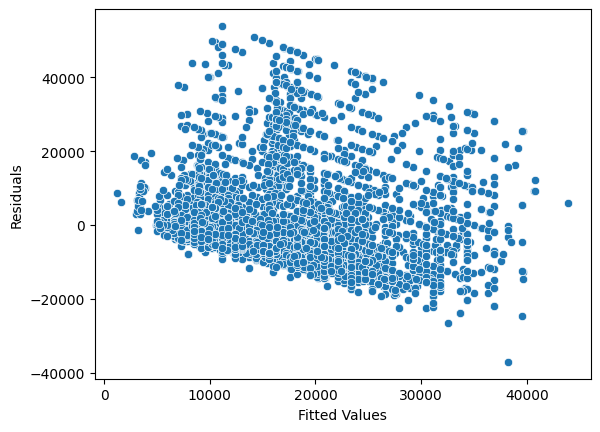

In [33]:
import statsmodels.api as sm
# Explore the distribution of variables
sns.pairplot(data[['Rent', 'Size', 'BHK', 'Bathroom']])
plt.show()

# Check for multicollinearity
correlation_matrix = data[['Size', 'BHK', 'Bathroom', 'Rent']].corr()
print(correlation_matrix)

# Fit a regression model
X = data[['Size', 'BHK', 'Bathroom']]
y = data['Rent']
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()  
print(model.summary())

# Check for homoscedasticity
residuals = model.resid  # Get residuals
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Encoding

In [34]:
#Encoding Categorical Data
data2 = data.join(pd.get_dummies(data[['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']], drop_first=True))
data2.drop(columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'], inplace=True)

In [35]:
#Tipe data setelah proses encoding
data2.dtypes

BHK                                  int32
Rent                                 int32
Size                                 int32
Bathroom                             int32
Area Type_Built Area                  bool
Area Type_Carpet Area                 bool
Area Type_Super Area                  bool
City_Bangalore                        bool
City_Chennai                          bool
City_Delhi                            bool
City_Hyderabad                        bool
City_Kolkata                          bool
City_Mumbai                           bool
Furnishing Status_Furnished           bool
Furnishing Status_Semi-Furnished      bool
Furnishing Status_Unfurnished         bool
Tenant Preferred_Bachelors            bool
Tenant Preferred_Bachelors/Family     bool
Tenant Preferred_Family               bool
Point of Contact_Contact Agent        bool
Point of Contact_Contact Builder      bool
Point of Contact_Contact Owner        bool
dtype: object

In [36]:
data2.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
1,2,20000,800,1,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,2,17000,1000,1,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3,2,10000,800,1,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2,7500,850,1,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True


# Correlation Check use Heatmap

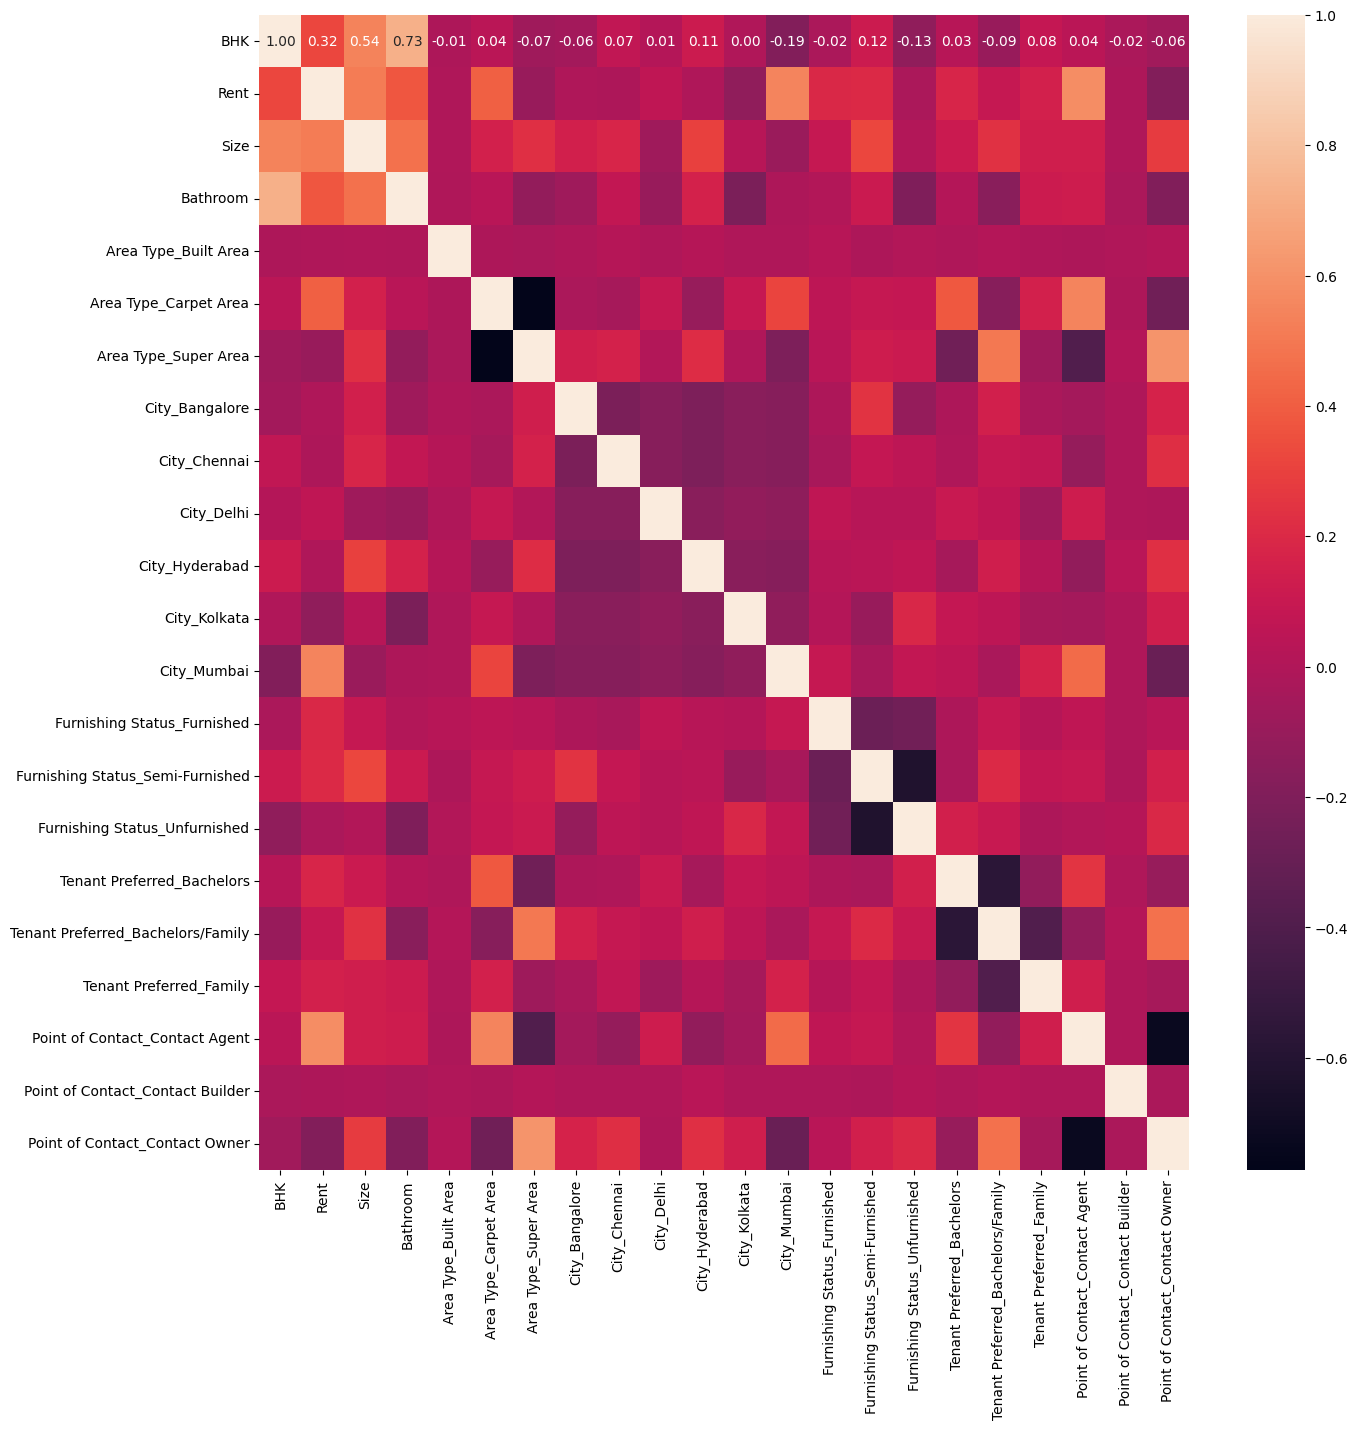

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(data2.corr(),annot=True,fmt='.2f')
plt.show()

# Scatter Plot Between Numeric Variable

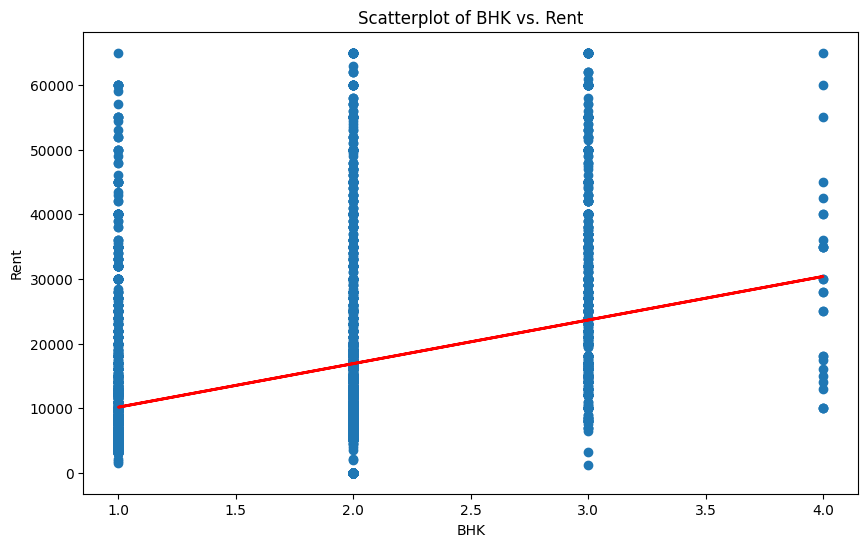

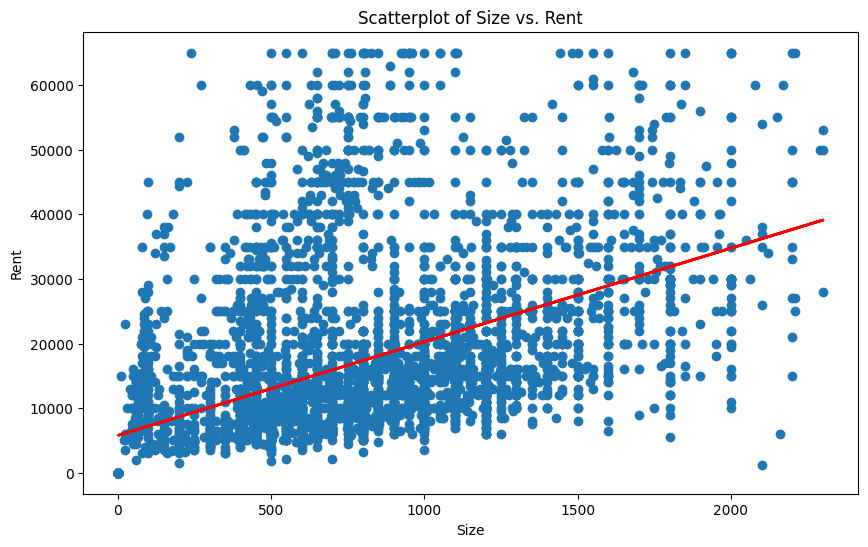

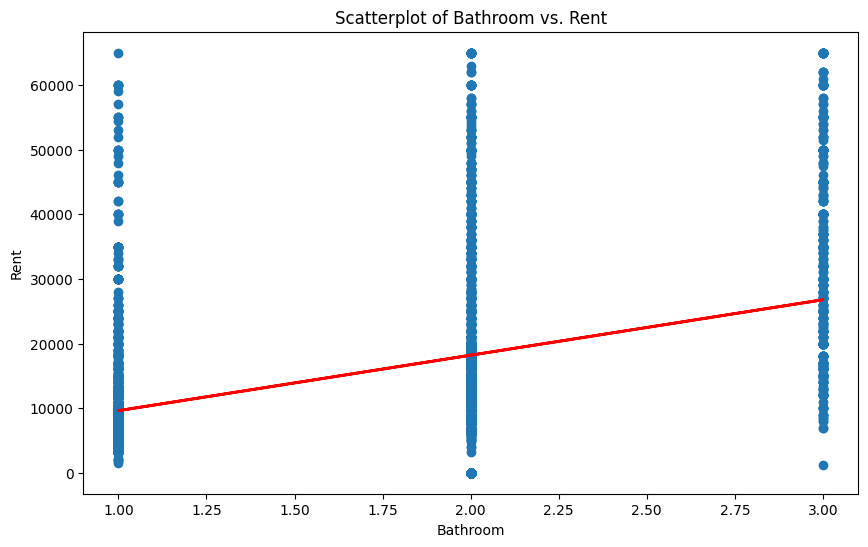

In [38]:
# Scatter plot BHK vs. Rent
bhk = data['BHK']
rent = data['Rent']

plt.figure(figsize=(10, 6))  # Tentukan ukuran gambar di sini
plt.scatter(bhk, rent)

# Menambahkan garis regresi
fit = np.polyfit(bhk, rent, 1)
regression_line = np.poly1d(fit)
plt.plot(bhk, regression_line(bhk), color='red', label='Regression Line', linewidth=2)

# Add labels and title
plt.xlabel('BHK')
plt.ylabel('Rent')
plt.title('Scatterplot of BHK vs. Rent')

# Show the plot
plt.show()

# Scatter plot Size vs. Rent
size = data['Size']
rent = data['Rent']

plt.figure(figsize=(10, 6))  # Tentukan ukuran gambar di sini
plt.scatter(size, rent)

# Menambahkan garis regresi
fit = np.polyfit(size, rent, 1)
regression_line = np.poly1d(fit)
plt.plot(size, regression_line(size), color='red', label='Regression Line', linewidth=2)

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('Scatterplot of Size vs. Rent')

# Show the plot
plt.show()

# Scatter plot Bathroom vs. Rent
bathroom = data['Bathroom']
rent = data['Rent']

plt.figure(figsize=(10, 6))  # Tentukan ukuran gambar di sini
plt.scatter(bathroom, rent)

# Menambahkan garis regresi
fit = np.polyfit(bathroom, rent, 1)
regression_line = np.poly1d(fit)
plt.plot(bathroom, regression_line(bathroom), color='red', label='Regression Line', linewidth=2)

# Add labels and title
plt.xlabel('Bathroom')
plt.ylabel('Rent')
plt.title('Scatterplot of Bathroom vs. Rent')

# Show the plot
plt.show()

# MODELING

## Train Test Declaration

In [39]:
#Memisahkan training dan testing data
X=data2.drop('Rent', axis=1)
y=data2['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Linear Regression

In [41]:
linearmodel = LinearRegression()
linearmodel.fit(X_train, y_train)

LinearRegression()

In [42]:
# Evaluate how well the model fits the training data
print("Linear Regression Training Accuracy:", linearmodel.score(X_train, y_train))

# Evaluate the model on the test set
print("Linear Regression Test Accuracy:", linearmodel.score(X_test, y_test))

Linear Regression Training Accuracy: 0.7476764165598051
Linear Regression Test Accuracy: 0.7462646804656783


In [43]:
# Display coefficients and intercept
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': linearmodel.coef_})
intercept = linearmodel.intercept_
print('\nCoefficients:\n', coefficients)
print('\nIntercept:', intercept)


Coefficients:
                              Variable   Coefficient
0                                 BHK   3606.006353
1                                Size      7.998930
2                            Bathroom   2677.401121
3                Area Type_Built Area   2817.238349
4               Area Type_Carpet Area   3901.287641
5                Area Type_Super Area   3604.920105
6                      City_Bangalore   -856.093318
7                        City_Chennai  -1616.480923
8                          City_Delhi   1854.532183
9                      City_Hyderabad  -3236.519192
10                       City_Kolkata  -3941.270738
11                        City_Mumbai  18119.278084
12        Furnishing Status_Furnished   6221.375278
13   Furnishing Status_Semi-Furnished   2632.112927
14      Furnishing Status_Unfurnished   1469.957890
15         Tenant Preferred_Bachelors   4684.790144
16  Tenant Preferred_Bachelors/Family   3765.448792
17            Tenant Preferred_Family   1873.207

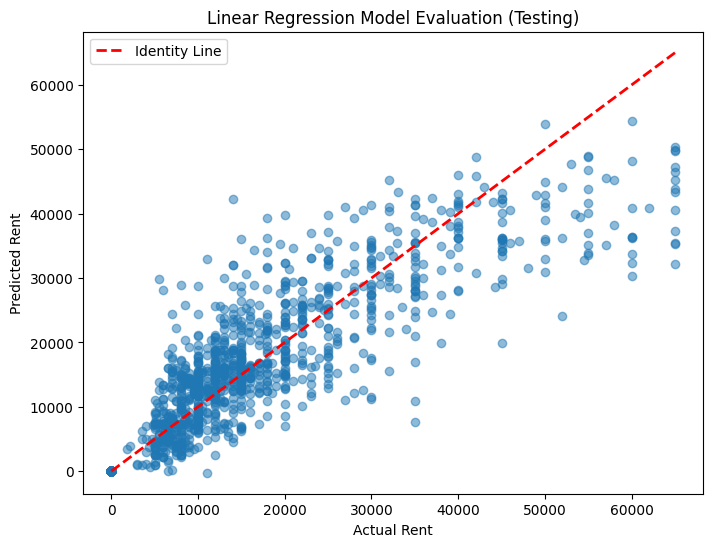

R-squared: 0.7462646804656783


In [44]:
# Predict the values using the trained linear model
y_pred = linearmodel.predict(X_test)

# Scatter plot untuk evaluasi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Identity Line')
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Linear Regression Model Evaluation (Testing)')

# Menambahkan label dan legend
plt.legend()
plt.show()

# Hitung dan tampilkan nilai R-squared
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

# Lasso Linear Regression

In [45]:
from sklearn.linear_model import Lasso

modellasso = Lasso(alpha=1.0)
modellasso.fit(X_train, y_train)

C:\Users\Felix\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.165e+09, tolerance: 6.994e+07
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [46]:
# Evaluate how well the model fits the training data
print("Lasso Regression Training Accuracy:", linearmodel.score(X_train, y_train))

# Evaluate the model on the test set
print("Lasso Regression Test Accuracy:", linearmodel.score(X_test, y_test))

Lasso Regression Training Accuracy: 0.7476764165598051
Lasso Regression Test Accuracy: 0.7462646804656783


In [47]:
pred = linearmodel.predict(X_test)

# Print the coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': modellasso.coef_})
print(coefficients)

# Print the intercept
intercept_value = modellasso.intercept_
print(f'Intercept: {intercept_value}')
y_pred = modellasso.predict(X_test)

# Evaluate how well the model fits the training data
print("Lasso Regression Training Accuracy:", modellasso.score(X_train, y_train))

# Evaluate the model on the test set
print("Lasso Regression Test Accuracy:", modellasso.score(X_test, y_test))

                             Variable   Coefficient
0                                 BHK   3592.506117
1                                Size      8.037380
2                            Bathroom   2663.821860
3                Area Type_Built Area    930.134702
4               Area Type_Carpet Area   3807.778297
5                Area Type_Super Area   3505.149823
6                      City_Bangalore   2124.241068
7                        City_Chennai   1370.731893
8                          City_Delhi   4842.643861
9                      City_Hyderabad   -233.437349
10                       City_Kolkata   -943.542358
11                        City_Mumbai  21105.999683
12        Furnishing Status_Furnished   4785.031064
13   Furnishing Status_Semi-Furnished   1199.994118
14      Furnishing Status_Unfurnished     40.468783
15         Tenant Preferred_Bachelors   2810.534075
16  Tenant Preferred_Bachelors/Family   1902.363569
17            Tenant Preferred_Family      0.000000
18     Point